### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή:

Α.Μ.: 03119214

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [2]:
import numpy as np

image = np.load('indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [3]:
notes = np.load('indian_pines_gt.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [4]:
# 2a) calculate dimensions of the image

# Since each pixel has a label, the dimensions of the image are the dimensions of the notes
print('Image dimensions are:', notes.shape)
print('Image has', len(image[0][0]), 'different spectrum chanels' )


Image dimensions are: (145, 145)
Image has 200 different spectrum chanels


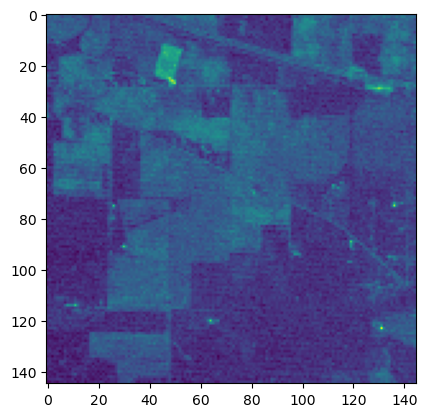

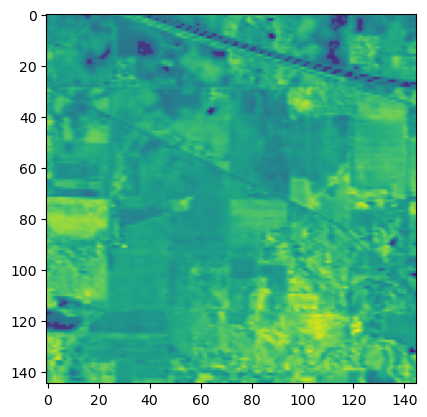

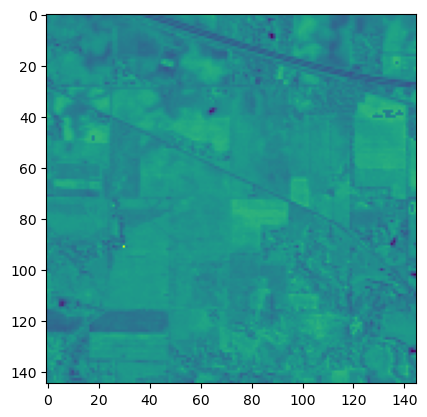

In [65]:
#2b) plot 3rd 65th and 95th spectrums
import matplotlib.pyplot as plt
fig1 = plt.figure() 
plt.imshow(image[:,:,2])
fig2 = plt.figure() 
plt.imshow(image[:,:,64])
fig3 = plt.figure() 
plt.imshow(image[:,:,94])

In [6]:
#2c) calculate unique categories & their counts for 2e)
categories, counts = np.unique(notes, return_counts=True)
print('There are',len(categories), 'different categories within the notes')

There are 17 different categories within the notes


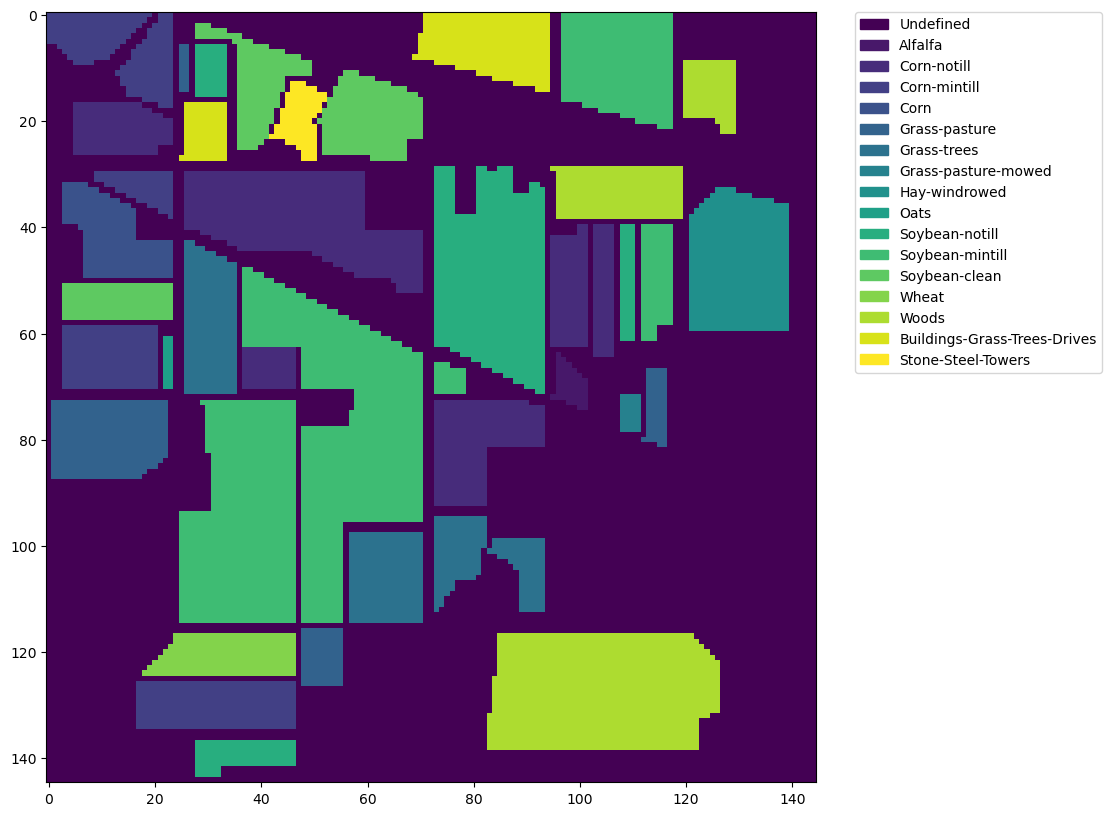

In [7]:
#2d) plot categories
import matplotlib.patches as mpatches
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Create a dictionary for labeling
myDict = {}
for iCategory in categories:
    myDict[iCategory] = {classes[iCategory]}
fig4 = plt.figure(figsize=[10, 10])
im = plt.imshow(notes)
colors = [ im.cmap(im.norm(category)) for category in categories]
patches = [ mpatches.Patch(color=colors[i], label=classes[i]) for i in range(len(categories))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

In [8]:
#2e) calculate number of pixels that belong to each category
for iCategory in categories:
    print('There are', counts[iCategory], classes[iCategory], 'in this image')

There are 10776 Undefined in this image
There are 46 Alfalfa in this image
There are 1428 Corn-notill in this image
There are 830 Corn-mintill in this image
There are 237 Corn in this image
There are 483 Grass-pasture in this image
There are 730 Grass-trees in this image
There are 28 Grass-pasture-mowed in this image
There are 478 Hay-windrowed in this image
There are 20 Oats in this image
There are 972 Soybean-notill in this image
There are 2455 Soybean-mintill in this image
There are 593 Soybean-clean in this image
There are 205 Wheat in this image
There are 1265 Woods in this image
There are 386 Buildings-Grass-Trees-Drives in this image
There are 93 Stone-Steel-Towers in this image


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [23]:
reshapedImage = image.reshape(-1, len(image[0][0][:]))
reshapedNotes = notes.reshape(notes.size)

cleanData = []

for iPixel in range(len(reshapedNotes)):
    if reshapedNotes[iPixel] > 0:
        cleanData.append(reshapedImage[iPixel])

cleanData = np.vstack(cleanData)

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [62]:
# Find new unique labels
unique_labels = np.unique(reshapedNotes[reshapedNotes>0])

random_pixels_by_category = []

for label in unique_labels:
    indices = np.where(reshapedNotes == label)[0]
    random_index = np.random.choice(indices)
    random_pixels_by_category.append(reshapedImage[random_index])

# Convert the list to a NumPy array
random_pixels_by_category = np.vstack(random_pixels_by_category)

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

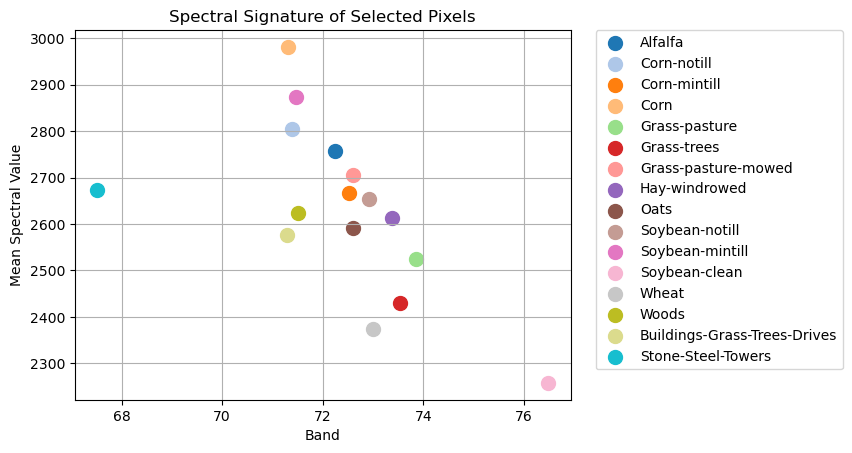

In [63]:
num_bands = len(random_pixels_by_category[0])
colors = plt.cm.tab20(np.linspace(0, 1, 17))

# Plot the spectral signature for each category
for iLabel in range(len(random_pixels_by_category)):
    
    centroid_x = np.sum(range(1,num_bands+1) * random_pixels_by_category[iLabel]) / np.sum(random_pixels_by_category[iLabel])
    centroid_y = np.mean(random_pixels_by_category[iLabel])
    
    # Plot the spectral signature
    plt.scatter(centroid_x, centroid_y, marker="o", s=100, label=f'{classes[iLabel+1]}', color=colors[iLabel])


# Add labels and legend
plt.xlabel('Band')
plt.ylabel('Mean Spectral Value')
plt.title('Spectral Signature of Selected Pixels')
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

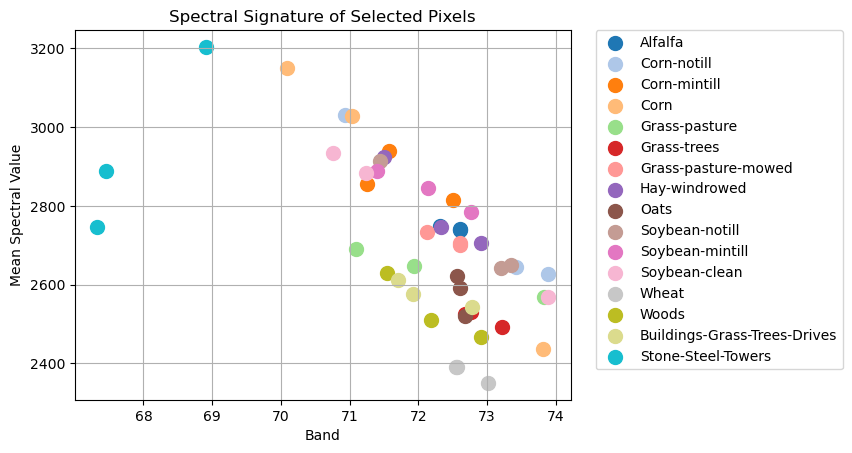

In [64]:
# Same code as previously, just modified to select multiple random pixels from each category
unique_labels = np.unique(reshapedNotes[reshapedNotes > 0])
random_pixels_by_category = []

# Set the number of pixels to obtain per category
pixels_per_category = 3

for label in unique_labels:
    indices = np.where(reshapedNotes == label)[0]
    
    # Check that there are enough indices for the desired number of pixels
    if len(indices) >= pixels_per_category:
        # Randomly choose three indices for the current category
        random_indices = np.random.choice(indices, size=pixels_per_category, replace=False)
        # Get the corresponding pixels and add them to the list
        random_pixels_by_category.extend(reshapedImage[random_indices])

# Convert the list to a NumPy array
random_pixels_by_category = np.vstack(random_pixels_by_category)


num_bands = len(random_pixels_by_category[0])
colors = plt.cm.tab20(np.linspace(0, 1, 17))

centroid_x = []
centroid_y = []
count = 0
label = 0
# Plot the spectral signature for each category
for iLabel in range(len(random_pixels_by_category)):
    centroid_x.append(np.sum(range(1,num_bands+1) * random_pixels_by_category[iLabel])/ np.sum(random_pixels_by_category[iLabel]))
    centroid_y.append(np.mean(random_pixels_by_category[iLabel]))
    count +=1
    # Plot the spectral signature
    if count == pixels_per_category:
        count = 0
        plt.scatter(centroid_x, centroid_y, marker="o", s=100, label=f'{classes[label+1]}', color=colors[label])
        centroid_x = []
        centroid_y = []
        label +=1


# Add labels and legend
plt.xlabel('Band')
plt.ylabel('Mean Spectral Value')
plt.title('Spectral Signature of Selected Pixels')
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

 Παρατηρούμε όπως έιναι αναμενόμενο, πως τα pixel που ανήκουν στην ίδια κατηγορία, παρουσιάζουν κάποια ομοιομορφία σχετικά με την φασματική υπογραφή τους, και ειδικά με βάση το ερώτημα 3ε) μοιάζει οι περισσότερες κατηγορίες να είναι έυκολα διαχωρίσημες. Όταν όμως επιλέξουμε 3 pixel αντί για 1 αυτό αλλάζει καθώς πλέον έχουμε pixel που ανήκουν σε διαφορετικές κατηγορίες να μπλέκονται μεταξύ τους.
 
 * Με βάση τα προηγούμενα διαγράμματα παρατηρούμε πως ορισμένες κατηγορίες είναι έυκολα διαχωρίσημες βάση των φασματικών υπογραφών τους, όπως η κατηγορία **stone - steel towers**, και σε ένα βαθμό η **Wheat**. Από την άλλη όμως οι περισσότερες κατηγορίες είναι δύσκολα διαχωρίσημες με χειρότερη να είναι μάλλον η κατηγορία **Corn** που είναι ιδιάιτερα scattered, επομένως, η φασματική υπογραφή δίχως επεξεργασία και filtering δεν αρκεί για να διαχωρίσουμε τις κατηγορίες.


* Κρίνοντας με βάση τα παραπάνω σίγουρα **υπάρχουν κανάλια τα οποία εισάγουν θόρυβο και δεν παρέχουν χρήσιμη πληροφορία**, γεγονός που θα εξηγούσε μεγάλα inconsistencies όπως εκείνο της κατηγορίας **Corn**

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

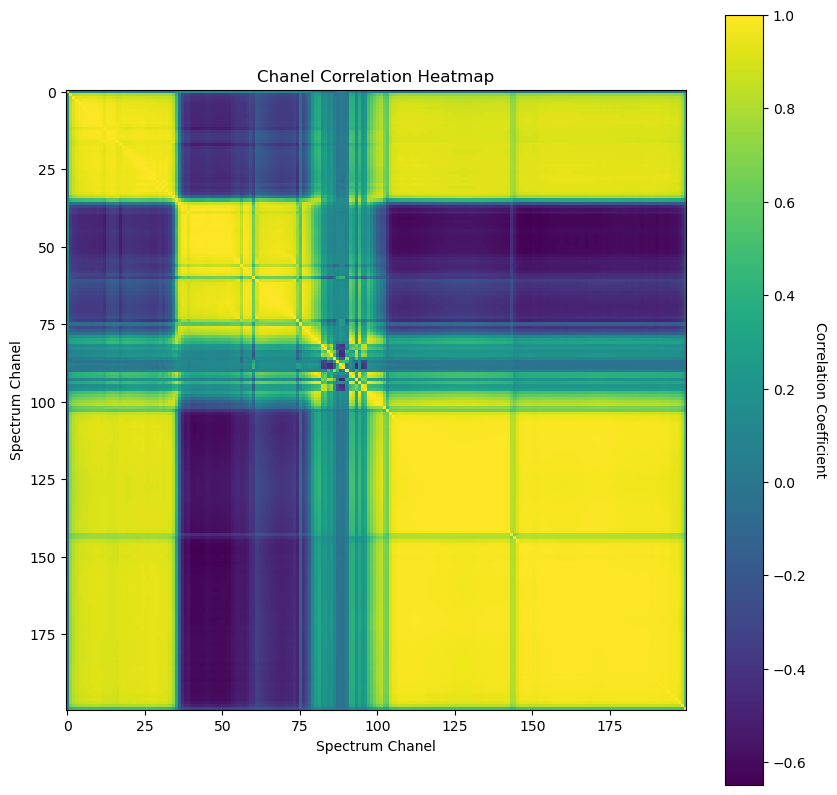

In [73]:
corr_matrix = np.corrcoef(cleanData.T)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix)
plt.title('Chanel Correlation Heatmap')
plt.xlabel('Spectrum Chanel')
plt.ylabel('Spectrum Chanel')
cbar = plt.colorbar()
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [ ]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;